In [ ]:
import pandas as pd
import os


In [ ]:
# Define the path to the datasets (assuming current directory)
datasets_path = '.'  # or set to your specific path if different

# Load the datasets
orders_df = pd.read_csv(os.path.join(datasets_path, 'data_orders.csv'))
offers_df = pd.read_csv(os.path.join(datasets_path, 'data_offers.csv'))

In [ ]:
# Display basic information and the first few rows
print("Orders DataFrame Info:")
orders_df.info()
print("\nFirst 5 rows of Orders DataFrame:")
print(orders_df.head())

print("\nOffers DataFrame Info:")
offers_df.info()
print("\nFirst 5 rows of Offers DataFrame:")
print(offers_df.head())

Orders DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 10716 non-null  object 
 1   origin_longitude               10716 non-null  float64
 2   origin_latitude                10716 non-null  float64
 3   m_order_eta                    2814 non-null   float64
 4   order_gk                       10716 non-null  int64  
 5   order_status_key               10716 non-null  int64  
 6   is_driver_assigned_key         10716 non-null  int64  
 7   cancellations_time_in_seconds  7307 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 669.9+ KB

First 5 rows of Orders DataFrame:
  order_datetime  origin_longitude  origin_latitude  m_order_eta  \
0       18:08:07         -0.978916        51.456173         60.0   
1       20:57:32         -0.950385

<ipython-input-21-b7906a5365e4>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=failure_counts.index, y=failure_counts.values, palette='viridis')


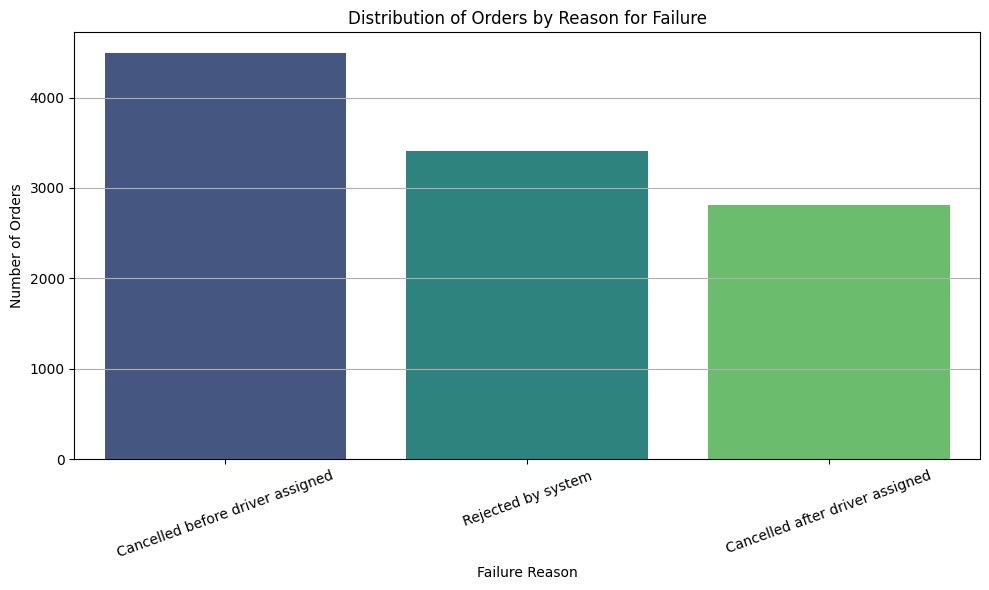

,count
failure_reason,
Cancelled before driver assigned,4496
Rejected by system,3409
Cancelled after driver assigned,2811


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorize reasons for failure
def categorize_failure(row):
    if row['order_status_key'] == 4 and row['is_driver_assigned_key'] == 0:
        return 'Cancelled before driver assigned'
    elif row['order_status_key'] == 4 and row['is_driver_assigned_key'] == 1:
        return 'Cancelled after driver assigned'
    elif row['order_status_key'] == 9:
        return 'Rejected by system'
    else:
        return 'Other'

orders_df['failure_reason'] = orders_df.apply(categorize_failure, axis=1)

# Count the number of each category
failure_counts = orders_df['failure_reason'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=failure_counts.index, y=failure_counts.values, palette='viridis')
plt.title('Distribution of Orders by Reason for Failure')
plt.ylabel('Number of Orders')
plt.xlabel('Failure Reason')
plt.xticks(rotation=20)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

failure_counts
